### 🔄 Cambio de variable en probabilidad

Cuando transformamos una variable aleatoria $X$ mediante una función $Y = g(X)$, la distribución de $Y$ depende del tipo de variable (discreta o continua) y de la forma de $g$.

---

## 📊 Caso discreto

Si $X$ es una variable aleatoria discreta y $Y = g(X)$, entonces la función de masa de probabilidad (pmf) de $Y$ es:

$$
\mathbb{P}(Y = y) = \sum_{x : g(x) = y} \mathbb{P}(X = x)
$$

> 🔎 Se suman las probabilidades de todos los valores de $X$ que generan el mismo valor $y$ al aplicar $g$.

---

## 📈 Caso continuo (con función derivable y monótona)

Si $X$ es una variable continua con densidad $f_X(x)$, y $Y = g(X)$ con $g$ derivable e **inversible** (estrictamente monótona), entonces la densidad de $Y$ es:

$$
f_Y(y) = f_X(g^{-1}(y)) \cdot \left| \frac{d}{dy} g^{-1}(y) \right|
$$

> Este factor $\left| \frac{d}{dy} g^{-1}(y) \right|$ se llama **jacobiano del cambio de variable**, y ajusta la escala de la densidad en el nuevo espacio.

---

### 📌 Ejemplo continuo: $X = e^Z$, con $Z \sim \mathcal{N}(\mu, \sigma^2)$

- Transformación: $X = e^Z$
- Inversa: $Z = \ln X$
- Derivada: $\frac{d}{dx} \ln x = \frac{1}{x}$

Entonces:

$$
f_X(x) = f_Z(\ln x) \cdot \frac{1}{x}
$$

> Esto es exactamente la forma de la **distribución log-normal**.

---



### 🎲 Ejemplo de cambio de variable en probabilidad discreta

Supongamos que una variable aleatoria $X$ tiene la siguiente distribución:

| $x$ | $\mathbb{P}(X = x)$ |
|----:|---------------------:|
| 1   | 0.2                 |
| 2   | 0.5                 |
| 3   | 0.3                 |

Queremos definir una nueva variable $Y = g(X)$ donde:

$$
Y = X^2
$$

---

### 🔁 Paso 1: Aplicar la transformación

Calculamos los valores posibles de $Y$:

- Si $X = 1 \Rightarrow Y = 1$
- Si $X = 2 \Rightarrow Y = 4$
- Si $X = 3 \Rightarrow Y = 9$

---

### 📊 Paso 2: Calcular la nueva distribución

| $y = g(x)$ | Valores de $x$ que lo generan | $\mathbb{P}(Y = y)$ |
|-----------:|------------------------------:|---------------------:|
| 1          | $x = 1$                       | $\mathbb{P}(X=1) = 0.2$ |
| 4          | $x = 2$                       | $\mathbb{P}(X=2) = 0.5$ |
| 9          | $x = 3$                       | $\mathbb{P}(X=3) = 0.3$ |

---

### ✅ Resultado

La función de masa de probabilidad (pmf) de $Y$ es:

$$
\mathbb{P}(Y = y) = \sum_{x : g(x) = y} \mathbb{P}(X = x)
$$

En este caso es una función 1 a 1, así que simplemente:

- $\mathbb{P}(Y = 1) = 0.2$
- $\mathbb{P}(Y = 4) = 0.5$
- $\mathbb{P}(Y = 9) = 0.3$

---

> 🧠 En cambio de variable discreto, si **más de un valor de $X$** se transforma en el **mismo valor de $Y$**, **las probabilidades se suman**.


### 🎲 Ejemplo de cambio de variable discreta **no inyectiva**

Supongamos la siguiente distribución de una variable discreta $X$:

| $x$ | $\mathbb{P}(X = x)$ |
|----:|---------------------:|
| -2  | 0.1                 |
| -1  | 0.2                 |
|  0  | 0.4                 |
|  1  | 0.2                 |
|  2  | 0.1                 |

Ahora definimos la variable transformada:

$$
Y = g(X) = X^2
$$

---

### 🔁 Paso 1: Ver cómo se transforman los valores

| $x$ | $Y = X^2$ |
|----:|-----------:|
| -2  | 4         |
| -1  | 1         |
|  0  | 0         |
|  1  | 1         |
|  2  | 4         |

---

### 📊 Paso 2: Agrupar los valores que generan el mismo $Y$

| $y$ | Valores de $x$ tales que $x^2 = y$ | $\mathbb{P}(Y = y)$ |
|----:|-----------------------------------:|---------------------:|
| 0   | $x = 0$                            | $0.4$                |
| 1   | $x = -1,\ 1$                       | $0.2 + 0.2 = 0.4$    |
| 4   | $x = -2,\ 2$                       | $0.1 + 0.1 = 0.2$    |

---

### ✅ Resultado final

La distribución de $Y = X^2$ es:

- $\mathbb{P}(Y = 0) = 0.4$
- $\mathbb{P}(Y = 1) = 0.4$
- $\mathbb{P}(Y = 4) = 0.2$

---

### 📌 Conclusión

Cuando la función $g$ **no es inyectiva** (es decir, **varios $x$ distintos producen el mismo $y$**), entonces la probabilidad de ese $y$ se obtiene **sumando** todas las probabilidades correspondientes:

$$
\mathbb{P}(Y = y) = \sum_{x : g(x) = y} \mathbb{P}(X = x)
$$


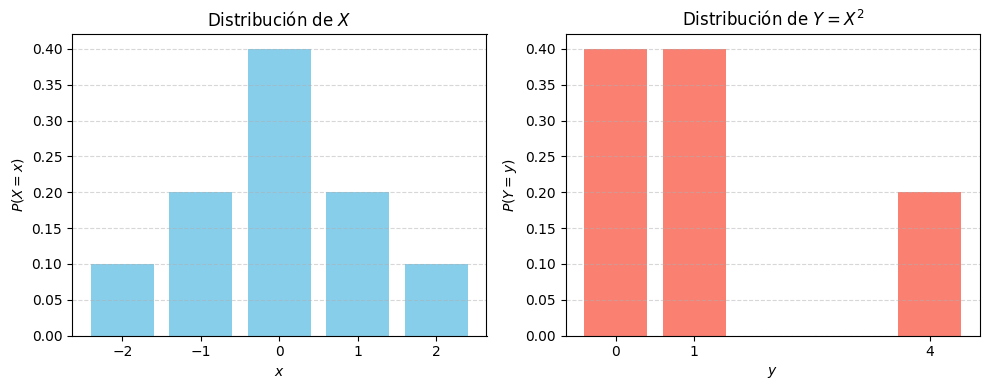

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Valores y probabilidades de X
x_vals = np.array([-2, -1, 0, 1, 2])
px = np.array([0.1, 0.2, 0.4, 0.2, 0.1])

# Transformación Y = X^2
y_vals = x_vals**2
# Agrupamos los resultados
unique_y, counts = np.unique(y_vals, return_counts=True)

# Sumar probabilidades para cada valor único de Y
py_dict = {}
for x, p in zip(x_vals, px):
    y = x**2
    py_dict[y] = py_dict.get(y, 0) + p

# Ordenar para graficar
y_unique = np.array(sorted(py_dict.keys()))
py = np.array([py_dict[y] for y in y_unique])

# Gráfica
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Distribución de X
axs[0].bar(x_vals, px, color='skyblue')
axs[0].set_title('Distribución de $X$')
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$P(X = x)$')
axs[0].set_xticks(x_vals)
axs[0].grid(True, axis='y', linestyle='--', alpha=0.5)

# Distribución de Y = X^2
axs[1].bar(y_unique, py, color='salmon')
axs[1].set_title('Distribución de $Y = X^2$')
axs[1].set_xlabel('$y$')
axs[1].set_ylabel('$P(Y = y)$')
axs[1].set_xticks(y_unique)
axs[1].grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



---
---
## 🔁 Cambio de variable en variable continua: Normal a Log-normal

Supongamos que:

$$
Z \sim \mathcal{N}(0, 1)
$$

Definimos una nueva variable aleatoria:

$$
X = e^Z
$$

Queremos encontrar la función de densidad de probabilidad (pdf) de $X$. Como se trata de una transformación continua, usamos el **cambio de variable para densidades**.

---

### 🧮 Paso 1: Invertir la transformación

La función inversa es:

$$
Z = \ln X
$$

---

### 🧮 Paso 2: Calcular el jacobiano

La derivada del cambio de variable (el jacobiano) es:

$$
\left| \frac{d}{dx} \ln x \right| = \frac{1}{x}
$$

---

### 🧮 Paso 3: Aplicar la fórmula

Dado que la densidad de $Z$ es:

$$
f_Z(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}}
$$

Entonces la densidad de $X = e^Z$ es:

$$
f_X(x) = f_Z(\ln x) \cdot \left| \frac{d}{dx} \ln x \right| = \frac{1}{x\sqrt{2\pi}} e^{-\frac{(\ln x)^2}{2}}, \quad x > 0
$$

---

### 📊 Interpretación

Esto muestra que:

$$
X = e^Z \sim \text{LogNormal}(0, 1)
$$

---

### 📈 Visualización

En el gráfico de la celda siguiente:

- A la izquierda se muestra la densidad de la variable original \( Z \sim \mathcal{N}(0, 1) \)
- A la derecha, se muestra la densidad de \( X = e^Z \), calculada tanto manualmente como usando `scipy.stats.lognorm`.

Esto permite ver cómo una transformación no lineal (en este caso exponencial) **distorsiona** la distribución original y la vuelve asimétrica.


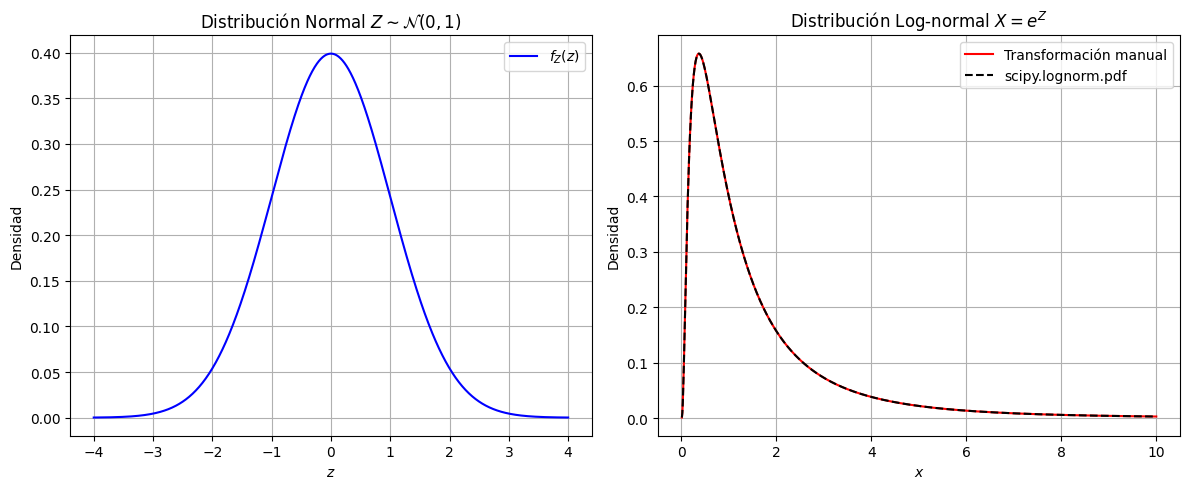

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Dominio para Z y X
z = np.linspace(-4, 4, 1000)
x = np.linspace(0.01, 10, 1000)

# Densidad normal estándar
fz = norm.pdf(z)

# Transformación: X = e^Z
x_trans = np.exp(z)

# Densidad log-normal calculada manualmente
def lognormal_pdf(x):
    return (1 / (x * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (np.log(x))**2)

# Densidad log-normal desde scipy para comparar
f_lognorm = lognorm.pdf(x, s=1, scale=np.exp(0))

# Gráfico
plt.figure(figsize=(12, 5))

# Densidad normal
plt.subplot(1, 2, 1)
plt.plot(z, fz, label='$f_Z(z)$', color='blue')
plt.title('Distribución Normal $Z \\sim \\mathcal{N}(0,1)$')
plt.xlabel('$z$')
plt.ylabel('Densidad')
plt.grid(True)
plt.legend()

# Densidad log-normal
plt.subplot(1, 2, 2)
plt.plot(x, lognormal_pdf(x), label='Transformación manual', color='red')
plt.plot(x, f_lognorm, '--', label='scipy.lognorm.pdf', color='black')
plt.title('Distribución Log-normal $X = e^Z$')
plt.xlabel('$x$')
plt.ylabel('Densidad')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
